# **PPE Objects Detection Using Computer Vision** 

This project involves the development of an object detection model to identify Personal Protective Equipment (PPE) such as helmets, gloves, safety vests, and masks using computer vision techniques. The objective is to create a robust system that can detect whether individuals are complying with safety regulations in workplace environments such as construction sites, factories, and laboratories.

Relevance of the Project:

Ensures workplace safety by detecting proper PPE usage.

Helps in reducing workplace hazards and accidents.

Demonstrates the application of deep learning and computer vision in real-world safety applications.

Enhances students by understanding of machine learning models, image processing, and dataset handling.

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.1/994.1 kB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
!yolo task=detect mode=predict model=yolov8l.pt conf=0.25 source="https://ultralytics.com/images/bus.jpg"

Ultralytics 8.3.104 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8l summary (fused): 112 layers, 43,668,288 parameters, 0 gradients, 165.2 GFLOPs

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 5 persons, 1 bicycle, 1 bus, 58.4ms
Speed: 3.3ms preprocess, 58.4ms inference, 182.1ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


# Custom Data Training

In [6]:
!yolo task=detect mode=train model=yolov8l.pt data=/content/drive/MyDrive/PPEDetectionDataset/data.yaml epochs=70 imgsz=640

Ultralytics 8.3.104 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/drive/MyDrive/PPEDetectionDataset/data.yaml, epochs=70, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True,

# Displaying YOLO Training Results

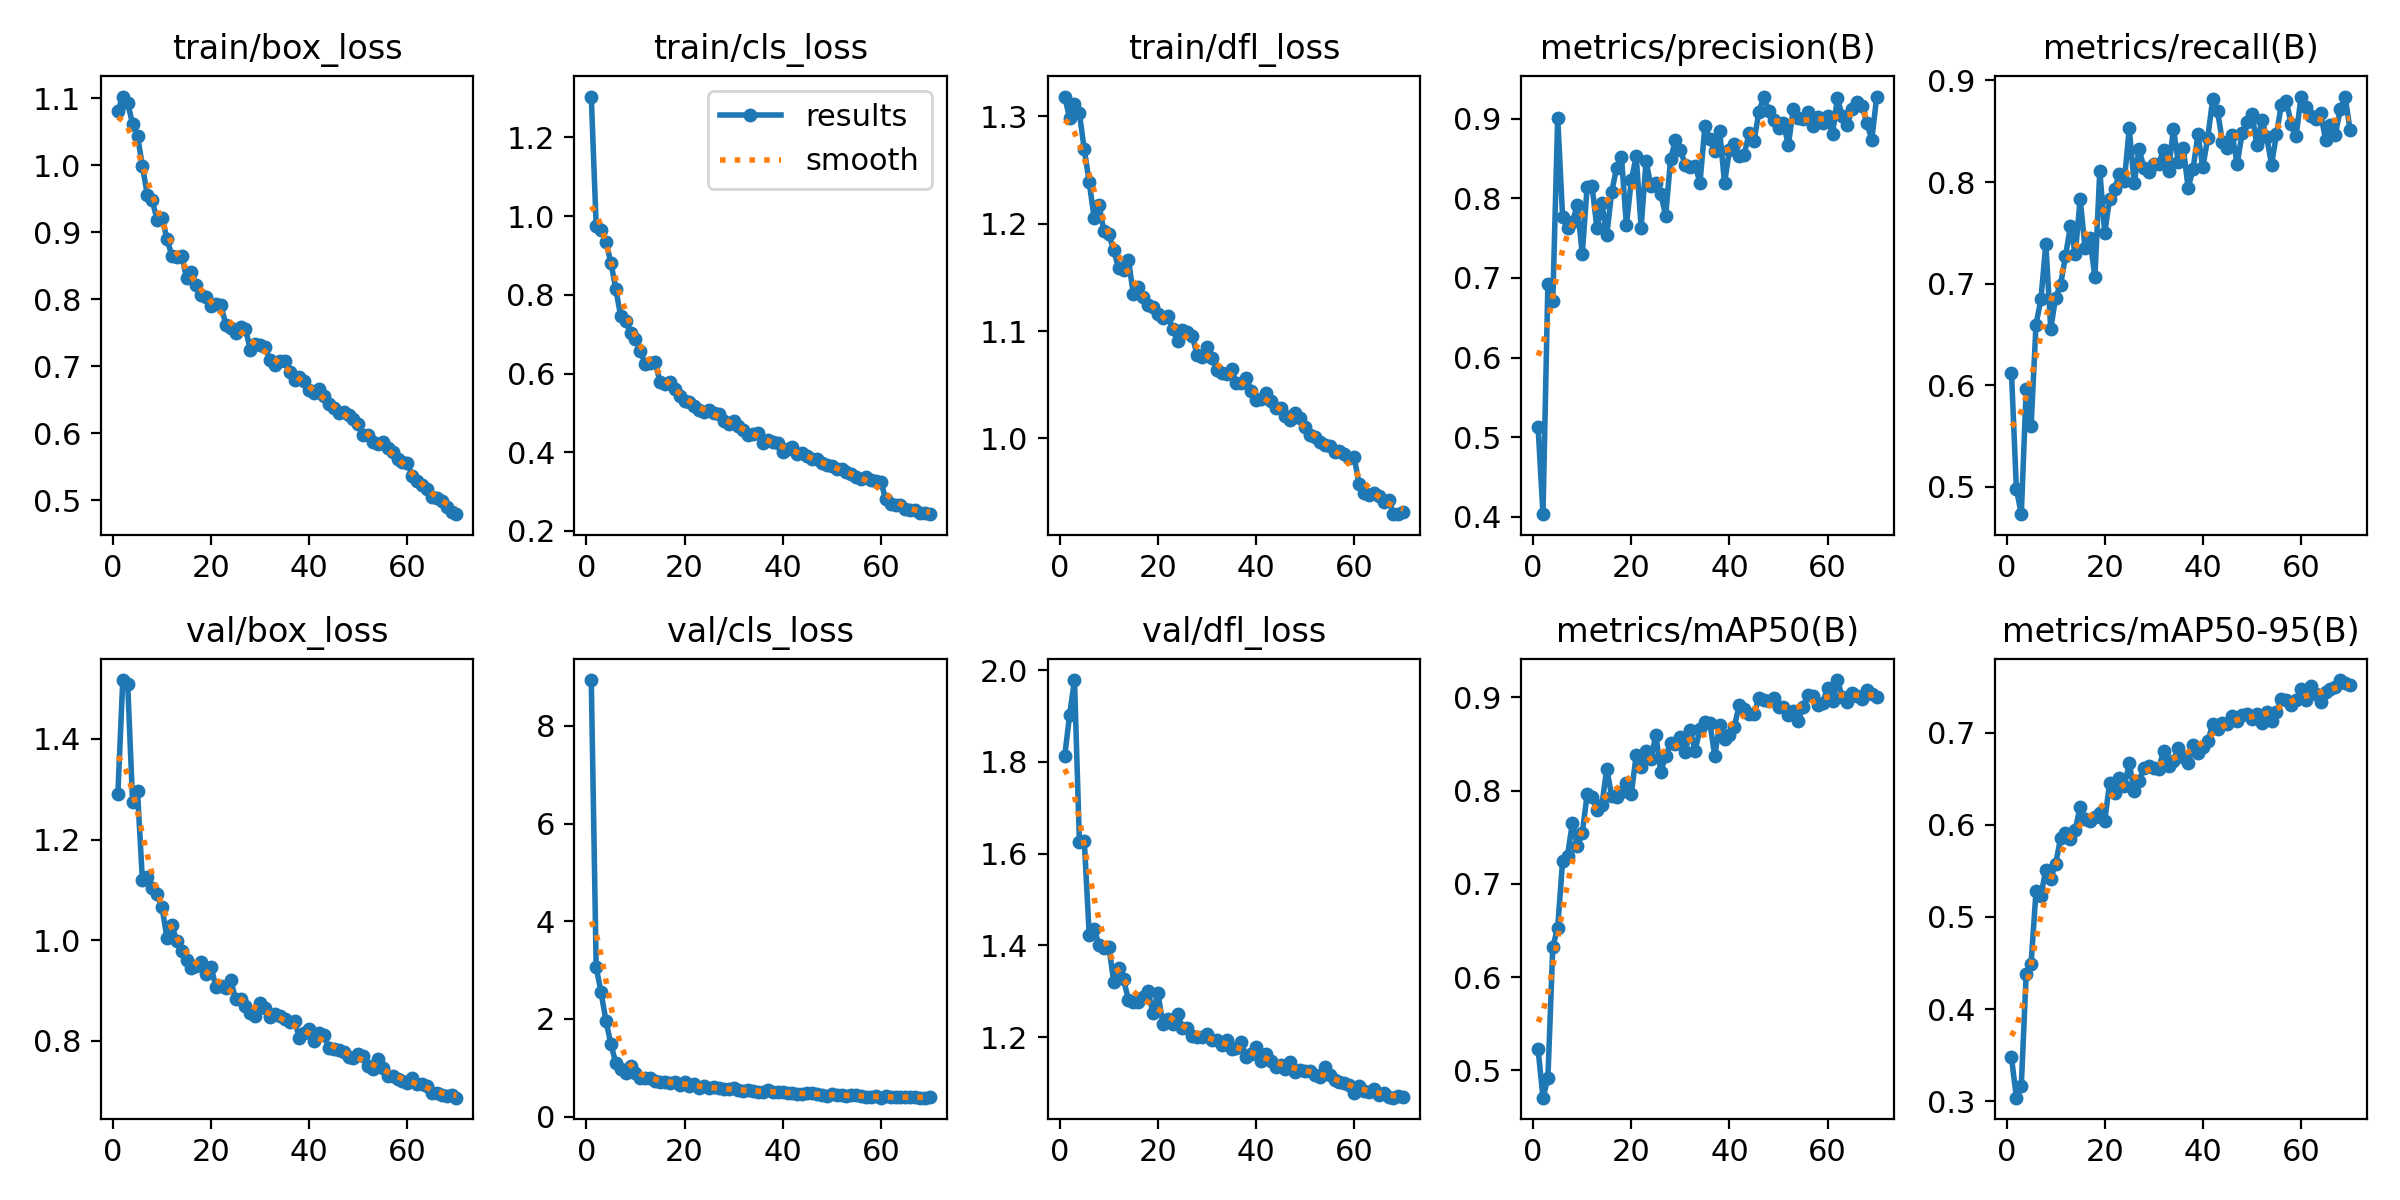

In [7]:
from IPython.display import display, Image

# Display training results
display(Image(filename='runs/detect/train/results.png'))


# Validating Trained YOLOv8 Model on PPE Dataset

We will now validate the trained YOLOv8 model using the validation set from our PPE Detection Dataset.
This step helps assess the model's performance using metrics like precision, recall, and mAP.

In [8]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=/content/drive/MyDrive/PPEDetectionDataset/data.yaml


Ultralytics 8.3.104 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,610,463 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/drive/.shortcut-targets-by-id/1-4d4XatIdTOGo7KCakXMVZPdz1F3ikYe/PPEDetectionDataset/valid/labels.cache... 420 images, 0 backgrounds, 0 corrupt: 100% 420/420 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 27/27 [00:16<00:00,  1.62it/s]
                   all        420       1797      0.894      0.871      0.908      0.757
                 boots        276        593      0.947      0.951      0.973      0.774
                gloves         23         41      0.719       0.56      0.649      0.477
                helmet        273        320      0.948      0.964      0.977      0.789
                 human        302        376      0.915      0.947      0.962      0.883
                  vest        354        467      0.944      0.93

# Running YOLOv8 PPE Detection on Test Image

In [15]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source=/content/drive/MyDrive/PPEDetectionDataset/valid/images/20220927_195254_jpg.rf.0deba32f1da867910a09d37bad01d618.jpg


Ultralytics 8.3.104 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,610,463 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/PPEDetectionDataset/valid/images/20220927_195254_jpg.rf.0deba32f1da867910a09d37bad01d618.jpg: 640x640 2 bootss, 1 helmet, 1 vest, 60.3ms
Speed: 3.0ms preprocess, 60.3ms inference, 146.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


# Displaying YOLOv8 Detection Results

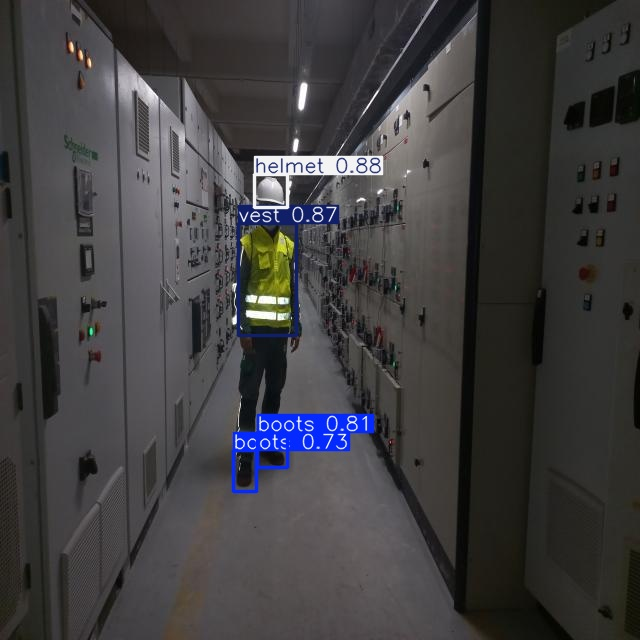

In [20]:
from IPython.display import display, Image
import glob

# Get the latest predicted image
predicted_image = glob.glob('/content/runs/detect/predict3/20220927_195254_jpg.rf.0deba32f1da867910a09d37bad01d618.jpg')[0]

# Display the image
display(Image(filename=predicted_image))


In [14]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source=/content/drive/MyDrive/PPEDetectionDataset/valid/images/20220721_161942_jpg.rf.445aed1cc41ed1dfb0b23729f0b26a91.jpg


Ultralytics 8.3.104 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,610,463 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/PPEDetectionDataset/valid/images/20220721_161942_jpg.rf.445aed1cc41ed1dfb0b23729f0b26a91.jpg: 640x640 1 gloves, 62.6ms
Speed: 2.5ms preprocess, 62.6ms inference, 147.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


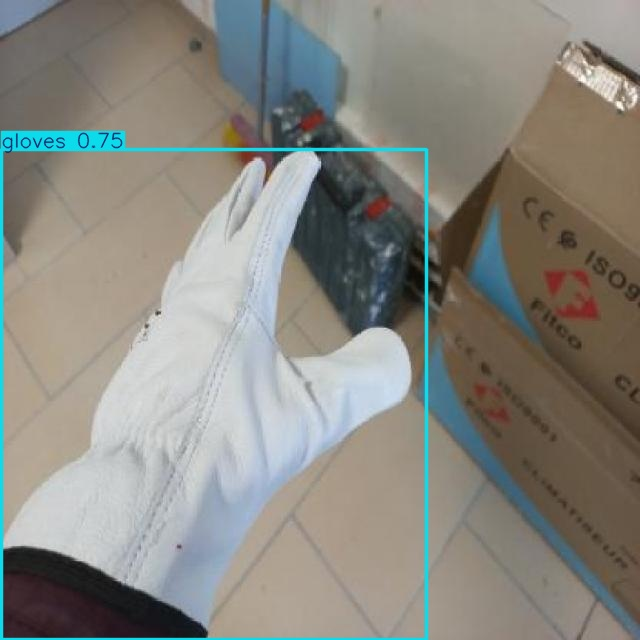

In [19]:
from IPython.display import display, Image
import glob

# Get the latest predicted image
predicted_image = glob.glob('/content/runs/detect/predict2/20220721_161942_jpg.rf.445aed1cc41ed1dfb0b23729f0b26a91.jpg')[0]

# Display the image
display(Image(filename=predicted_image))
